In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from pathlib import Path
import jax.numpy as jnp
import math

In [2]:
logs_base_path = "../../logs/"
experiment_names = ["mnist-slower"]

In [3]:
min_dots, max_dots = math.inf, -math.inf

for experiment_name in experiment_names:
  checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

  with open(checkpoint_dir, "r") as json_file:
    df = pd.read_json(json_file)

  max_dots = max(max_dots, max(df["dots"]))
  min_dots = min(min_dots, min(df["dots"]))

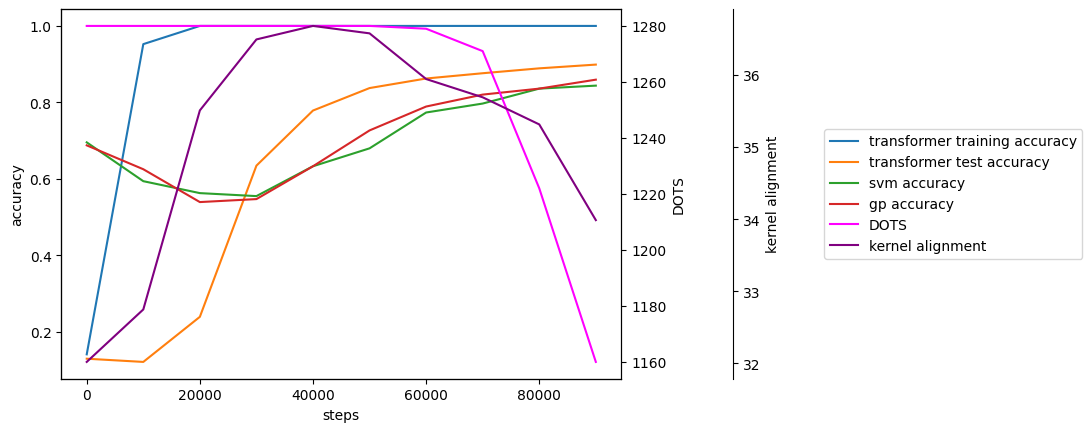

In [4]:
for i, experiment_name in enumerate(experiment_names):
    
  checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

  with open(checkpoint_dir, "r") as json_file:
    df = pd.read_json(json_file)

steps = df["step"]
transformer_training_accuracy = df["training_acc"]
transformer_test_accuracy = df["test_acc"]
svm_accuracy = df["svm_accuracy"]
dots = df["dots"]
gp_accuracy = df["gp_accuracy"]
kernel_alignment = df["kernel_alignment"]

fig, ax = plt.subplots()
fig.subplots_adjust(right=1)

twin_ax1 = ax.twinx() 
twin_ax2 = ax.twinx() 

twin_ax2.spines.right.set_position(("axes", 1.2))

plot1, = ax.plot(steps, transformer_training_accuracy, label="transformer training accuracy")
plot2, = ax.plot(steps, transformer_test_accuracy, label="transformer test accuracy")
plot3, = ax.plot(steps, svm_accuracy, label="svm accuracy")
plot4, = ax.plot(steps, gp_accuracy, label="gp accuracy")
plot5, = twin_ax1.plot(steps, dots, color="magenta", label="DOTS")
plot6, = twin_ax2.plot(steps, kernel_alignment, color="purple", label="kernel alignment")

ax.set_xlabel("steps")
ax.set_ylabel("accuracy")
twin_ax1.set_ylabel("DOTS")
twin_ax2.set_ylabel("kernel alignment")

ax.legend(handles=[plot1, plot2, plot3, plot4, plot5, plot6], loc='center left', bbox_to_anchor=(1.35, 0.5))

plt.show() 


In [12]:
min_dots, max_dots = math.inf, -math.inf

for experiment_name in experiment_names:
  checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")
  checkpoint_dir_reparam = Path(logs_base_path, "results", f"{experiment_name}-reparam-1000.json")

  with open(checkpoint_dir, "r") as json_file:
    df = pd.read_json(json_file)

  with open(checkpoint_dir_reparam, "r") as json_file:
    df_reparam = pd.read_json(json_file)

  max_dots = max(max_dots, max(df["dots"]))
  max_dots = max(max_dots, max(df_reparam["reparam_dots"]))

  min_dots = min(min_dots, min(df["dots"]))
  min_dots = min(min_dots, min(df_reparam["reparam_dots"]))

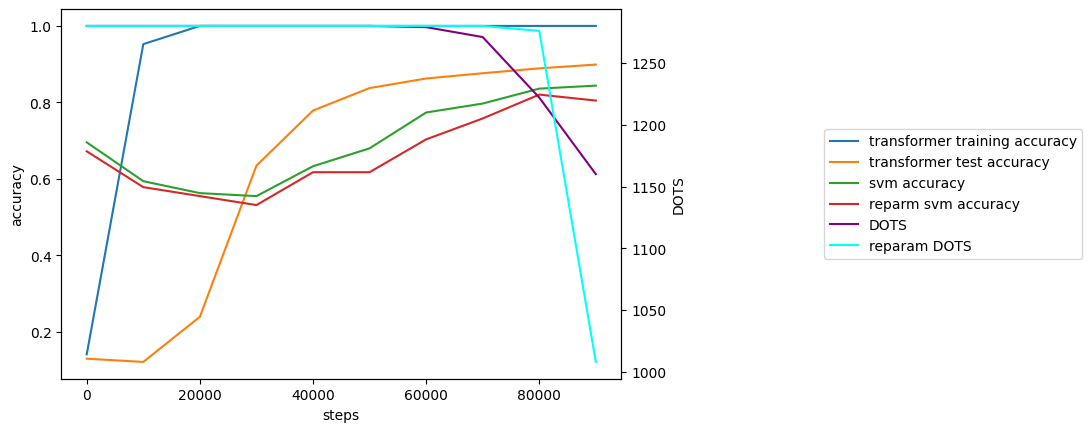

In [13]:
for i, experiment_name in enumerate(experiment_names):
    
  checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

  with open(checkpoint_dir, "r") as json_file:
    df = pd.read_json(json_file)

steps = df["step"]
transformer_training_accuracy = df["training_acc"]
transformer_test_accuracy = df["test_acc"]
svm_accuracy = df["svm_accuracy"]
dots = df["dots"]
gp_accuracy = df["gp_accuracy"]
kernel_alignment = df["kernel_alignment"]

reparam_svm_accuracy = df_reparam["reparam_svm_accuracy"]
reparam_dots = df_reparam["reparam_dots"]

fig, ax = plt.subplots()
fig.subplots_adjust(right=1)

twin_ax1 = ax.twinx() 

plot1, = ax.plot(steps, transformer_training_accuracy, label="transformer training accuracy")
plot2, = ax.plot(steps, transformer_test_accuracy, label="transformer test accuracy")
plot3, = ax.plot(steps, svm_accuracy, label="svm accuracy")
plot4, = ax.plot(steps, reparam_svm_accuracy, label="reparm svm accuracy")
plot5, = twin_ax1.plot(steps, dots, color="purple", label="DOTS")
plot6, = twin_ax1.plot(steps, reparam_dots, color="cyan", label="reparam DOTS")

ax.set_xlabel("steps")
ax.set_ylabel("accuracy")
twin_ax1.set_ylabel("DOTS")

ax.legend(handles=[plot1, plot2, plot3, plot4, plot5, plot6], loc='center left', bbox_to_anchor=(1.35, 0.5))

plt.show() 


In [ ]:
init_scale = [0.1, 0.5, 1, 8, 32, 128, 2048]
svm_accuracy = []

for experiment_name in experiment_names:
    checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

    with open(checkpoint_dir, "r") as json_file:
        df = pd.read_json(json_file)

    svm_accuracy.append(df["svm_accuracy"][0])

plt.plot(init_scale, svm_accuracy, marker='o')
plt.xscale("log")
plt.xlabel("Init Scale")
plt.ylabel("SVM Accuracy")
plt.title("Initial SVM Accuracy vs Init Scale")
plt.show()

In [7]:
s5_checkpoint_dir = Path(logs_base_path, "results", "s5.json")

with open(checkpoint_dir, "r") as json_file:
  df = pd.read_json(json_file)

print(jnp.array(df["kernel"][0]))

[[4207260.5   926567.2   886161.8  ... 1579979.4  1160899.9  1163921.9 ]
 [ 926567.2  1901744.9   412414.8  ...  861282.6   847615.5   553444.06]
 [ 886161.8   412414.8  2017606.4  ...  606726.6   596839.94  701513.5 ]
 ...
 [1579979.4   861282.6   606726.6  ... 2693215.5   950305.5  1081067.4 ]
 [1160899.9   847615.5   596839.94 ...  950305.5  3051216.8   760532.4 ]
 [1163921.9   553444.06  701513.5  ... 1081067.4   760532.4  2708633.5 ]]


2024-02-25 10:36:11.900952: W external/xla/xla/service/gpu/nvptx_compiler.cc:744] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
